In [1]:
# Default Import
import os
import pandas

# User Generated Imports
import webscraper
import dataImporter
import covidPlotter

Download the datafiles from: https://github.com/CSSEGISandData/COVID-19/

In [2]:
url = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series"
ext = 'csv'

# Location where data will be stored locally
datapath = os.getcwd() + "/data/csse_covid_19_time_series"

# Webscrape
webscraper.webscrape(datapath,url,ext)
population = webscraper.webscrape_population_2020()

Fetching Data From: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
Data is Stored in: /Users/awells/UVA/CS/apr_12_2020/cs-project-covid/data/csse_covid_19_time_series/
Fetching Data From: https://www.worldometers.info/world-population/population-by-country/


The Data files we'll be looking at:

In [3]:
!ls {datapath}

time_series_covid19_confirmed_US.csv
time_series_covid19_confirmed_global.csv
time_series_covid19_deaths_US.csv
time_series_covid19_deaths_global.csv
time_series_covid19_recovered_global.csv


In [4]:
covid_19_time_series_confirmed  = pandas.read_csv(datapath + '/time_series_covid19_confirmed_global.csv')
covid_19_time_series_deaths     = pandas.read_csv(datapath + '/time_series_covid19_deaths_global.csv')
covid_19_time_series_recovered  = pandas.read_csv(datapath + '/time_series_covid19_recovered_global.csv')

Confirmed Cases by Country

In [5]:
covid_19_time_series_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,273,281,299,349,367,423,444,484,521,555
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,277,304,333,361,377,383,400,409,416,433
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,986,1171,1251,1320,1423,1468,1572,1666,1761,1825
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,428,439,466,501,525,545,564,583,601,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,10,14,16,17,19,19,19,19


Deaths By Country

In [6]:
covid_19_time_series_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6,6,7,7,11,14,14,15,15,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,16,17,20,20,21,22,22,23,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,86,105,130,152,173,193,205,235,256,275
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,15,16,17,18,21,22,23,25,26,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


Recovered Cases by Country

In [7]:
covid_19_time_series_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,10,10,10,15,18,18,29,32,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,99,104,116,131,154,165,182,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,61,62,90,90,90,113,237,347,405,460
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,16,21,26,31,39,52,58,71,71
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,4


First We'll look at some basic Info about the confirmed cases. First lets look at a list of all the affected countries

In [8]:
unique_countries = sorted(covid_19_time_series_confirmed['Country/Region'].unique())
print(unique_countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran'

We can subset a country

In [9]:
us_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'US')

In [10]:
us_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396


In [11]:
# Since the 1st 4 columns (Province/State,Country/Region,Lat,Long) dont reference the date, we can start
# with the 5th column
dates = us_confirmed.columns[4:]
cases_per_day = us_confirmed.values[0][4:]
new_cases_per_day = [cases_per_day[i] - cases_per_day[i-1] for i in range(1,len(cases_per_day))]
new_cases_per_day.insert(0,cases_per_day[0]) #Add how many it was on day 1

In [12]:
print(dates)
print(cases_per_day)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20'],
      dtype='object')
[1 1 2 2 5 5 5 5 5 7 8

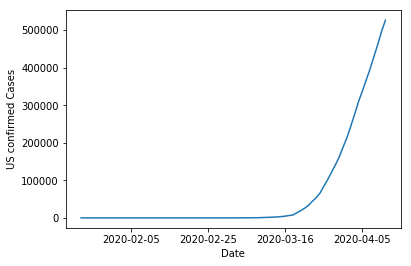

In [13]:
covidPlotter.plot_country_cases(us_confirmed,'US','confirmed')

Now lets look at the Number of Cases in Days Since Initial Outbreak

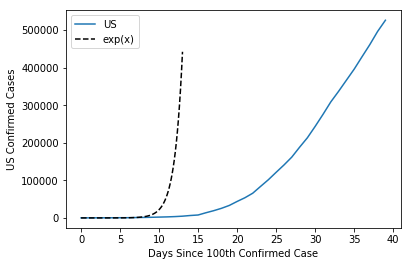

In [14]:
import covidPlotter
covidPlotter.plot_country_confirmed_cases_index(us_confirmed,'US', expGraph = True)

In [15]:
! echo "From the above plot we can see that in the U.S. in {len(dates)} days we have {cases_per_day[-1]} confirmed cases. This is an average of {float(cases_per_day[-1])/float(len(dates))} new cases per day"

From the above plot we can see that in the U.S. in 81 days we have 526396 confirmed cases. This is an average of 6498.716049382716 new cases per day


If that's the case, What is the increase per day look like?

Text(0, 0.5, 'Number of New Cases')

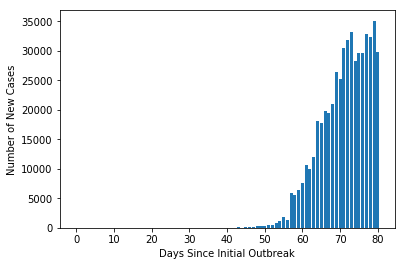

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(list(range(len(new_cases_per_day))), new_cases_per_day)
plt.xlabel("Days Since Initial Outbreak")
plt.ylabel("Number of New Cases")

Let's look at a boxplot of this information for the last 2 weeks (14 days)

[19444, 20922, 26341, 25200, 30390, 31824, 33267, 28219, 29595, 29556, 32829, 32385, 35098, 29861]


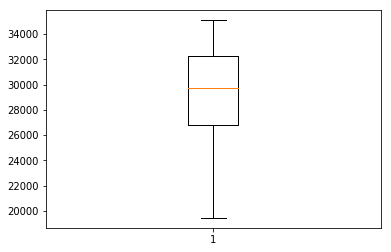

In [17]:
print(new_cases_per_day[-14:])
plt.boxplot(new_cases_per_day[-14:])
plt.show()

Let's compare the U.S. to some other countries

In [18]:
china_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'China')
spain_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'Spain')
germany_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'Germany')
italy_confirmed = dataImporter.subset_country(covid_19_time_series_confirmed,'Italy')

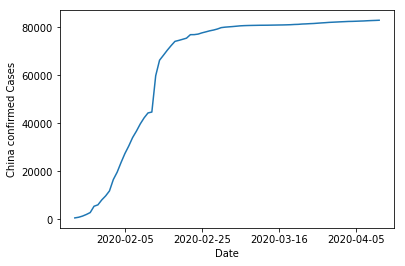

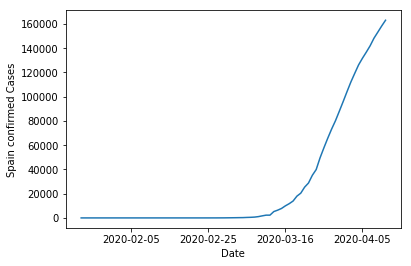

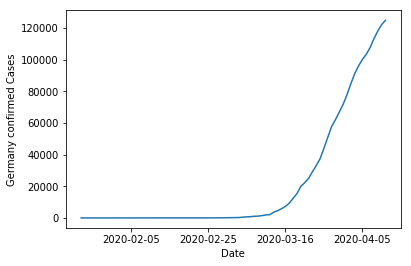

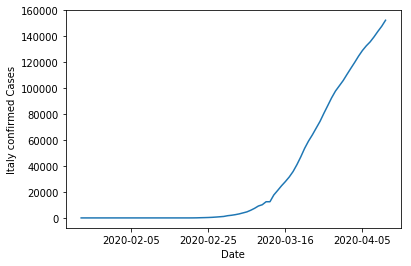

In [19]:
covidPlotter.plot_country_cases(china_confirmed,'China','confirmed')
covidPlotter.plot_country_cases(spain_confirmed,'Spain','confirmed')
covidPlotter.plot_country_cases(germany_confirmed,'Germany','confirmed')
covidPlotter.plot_country_cases(italy_confirmed,'Italy','confirmed')

In [20]:
us_days, us_cases_per_day, us_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(us_confirmed)
china_days, china_cases_per_day, china_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(china_confirmed)
germany_days, germany_cases_per_day, germany_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(germany_confirmed)
spain_days, spain_cases_per_day, spain_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(spain_confirmed)
italy_days, italy_cases_per_day, italy_new_cases_per_day = dataImporter.get_cases_confirmed_as_lists(italy_confirmed)


Number of Total Cases: 526396


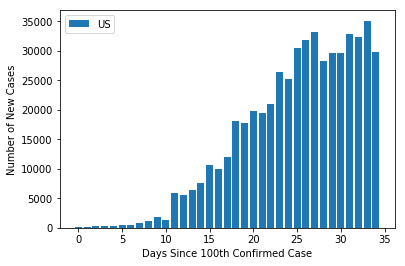

In [21]:
covidPlotter.plot_bar(us_new_cases_per_day,'US','Number of New Cases')
print("Number of Total Cases: {}".format(sum(us_new_cases_per_day)))

Number of Total Cases: 83014


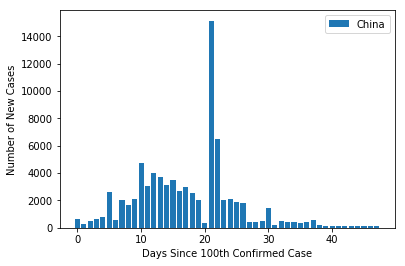

In [22]:
covidPlotter.plot_bar(china_new_cases_per_day,'China','Number of New Cases')
print("Number of Total Cases: {}".format(sum(china_new_cases_per_day)))

Number of Total Cases: 124908


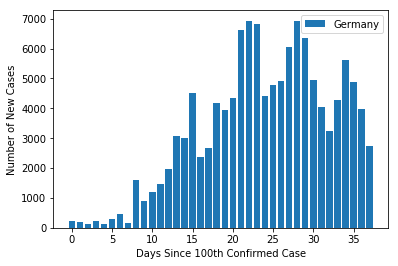

In [23]:
covidPlotter.plot_bar(germany_new_cases_per_day,'Germany','Number of New Cases')
print("Number of Total Cases: {}".format(sum(germany_new_cases_per_day)))

Number of Total Cases: 163027


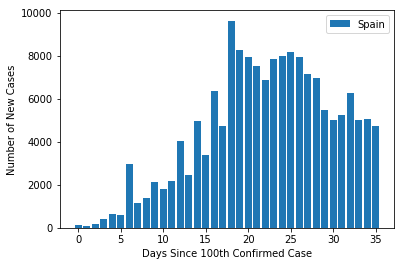

In [24]:
covidPlotter.plot_bar(spain_new_cases_per_day,'Spain','Number of New Cases')
print("Number of Total Cases: {}".format(sum(spain_new_cases_per_day)))

Number of Total Cases: 152271


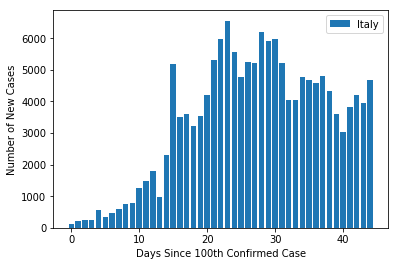

In [25]:
covidPlotter.plot_bar(italy_new_cases_per_day,'Italy','Number of New Cases')
print("Number of Total Cases: {}".format(sum(italy_new_cases_per_day)))

Let's Compare over the last 21 Days


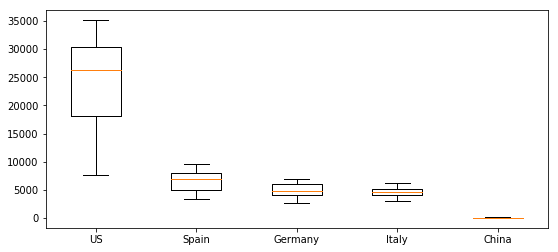

In [26]:
nDays = 21
print("Let's Compare over the last {} Days".format(nDays))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
all_data=[us_new_cases_per_day[-nDays:],
             spain_new_cases_per_day[-nDays:],
             germany_new_cases_per_day[-nDays:],
             italy_new_cases_per_day[-nDays:],
             china_new_cases_per_day[-nDays:]
            ]
axs.boxplot(all_data)
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))], xticklabels=['US', 'Spain', 'Germany', 'Italy','China'])
plt.show()

Let's Compare over the last 14 Days


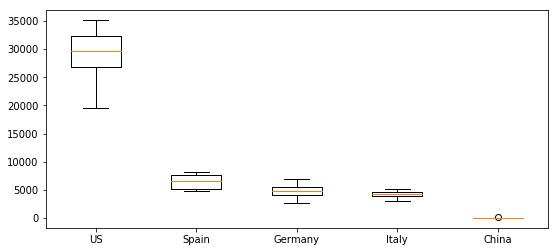

In [27]:
nDays = 14
print("Let's Compare over the last {} Days".format(nDays))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
all_data=[us_new_cases_per_day[-nDays:],
             spain_new_cases_per_day[-nDays:],
             germany_new_cases_per_day[-nDays:],
             italy_new_cases_per_day[-nDays:],
             china_new_cases_per_day[-nDays:]
            ]
axs.boxplot(all_data)
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))], xticklabels=['US', 'Spain', 'Germany', 'Italy','China'])
plt.show()

The next step of this analysis is to see if people are getting better

In [28]:
us_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'US')

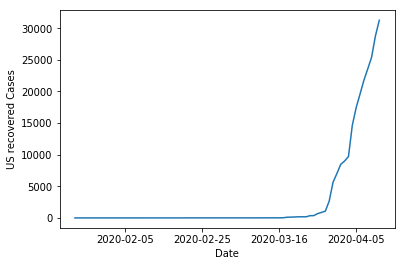

In [29]:
covidPlotter.plot_country_cases(us_recovered,'US','recovered')

Again, We'll compare to other countries

In [30]:
china_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'China')
spain_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'Spain')
germany_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'Germany')
italy_recovered = dataImporter.subset_country(covid_19_time_series_recovered,'Italy')

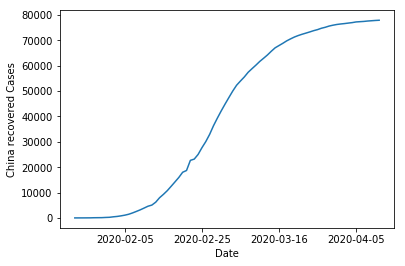

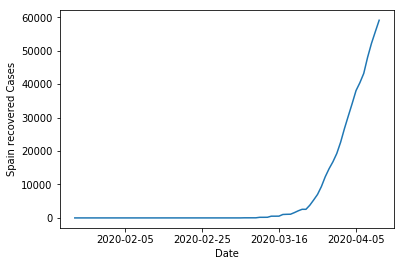

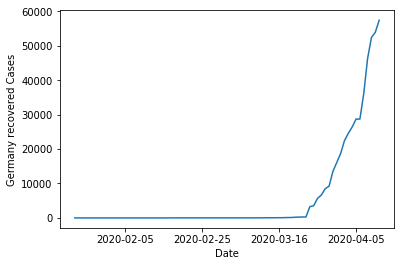

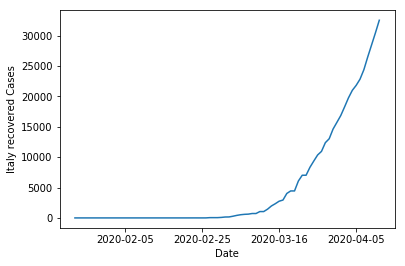

In [31]:
covidPlotter.plot_country_cases(china_recovered,'China','recovered')
covidPlotter.plot_country_cases(spain_recovered,'Spain','recovered')
covidPlotter.plot_country_cases(germany_recovered,'Germany','recovered')
covidPlotter.plot_country_cases(italy_recovered,'Italy','recovered')

Now Lets compare Confirmed vs recovered

In [32]:
us_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396


In [33]:
us_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,9001,9707,14652,17448,19581,21763,23559,25410,28790,31270


In [34]:
us_diff = us_confirmed.values[0][4:] - us_recovered.values[0][4:]# Confirmed - Recovered
print(us_diff)

[1 1 2 2 5 5 5 5 5 7 8 8 11 11 11 11 11 11 8 8 9 9 10 10 10 10 10 10 10 10
 10 10 10 46 45 51 52 53 61 67 91 111 142 210 255 395 511 576 951 1273
 1651 2167 2715 3487 4615 6404 7678 13626 19126 25424 33098 43669 53392
 65417 83155 100788 120393 138244 156187 181148 204898 234761 265879
 294201 319624 347086 374460 405493 436027 467745 495126]


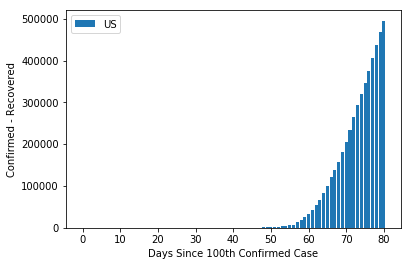

In [35]:
covidPlotter.plot_bar_active(us_diff,'US','Confirmed - Recovered') 

Now we'll do the same for China

In [36]:
china_confirmed = china_confirmed.groupby(['Country/Region']).sum().reset_index()
china_confirmed.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,82432,82511,82543,82602,82665,82718,82809,82883,82941,83014


In [37]:
china_recovered = china_recovered.groupby(['Country/Region']).sum().reset_index()
china_recovered.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
0,China,1083.3367,3684.4197,28,30,36,39,49,58,101,...,76565,76760,76946,77207,77310,77410,77567,77679,77791,77877


In [38]:
china_diff = china_confirmed.values[0][4:] - china_recovered.values[0][4:]# Confirmed - Recovered
print(china_diff)

[613 884 1367 2026 2819 5408 5967 8006 9588 11616 16167 19102 22864 26325
 29110 32111 34218 36610 38436 39750 39677 53678 58381 59115 59758 59972
 60005 58657 57063 56846 54302 53835 52226 50078 48082 45670 42599 40036
 37770 35282 32811 30385 28245 26746 25231 23435 22056 20706 19277 18031
 16749 15317 13986 13123 12260 11347 10621 9984 9448 9073 8684 8311 7888
 7601 7177 6899 6540 6275 6073 5956 5867 5751 5597 5395 5355 5308 5242
 5204 5150 5137]


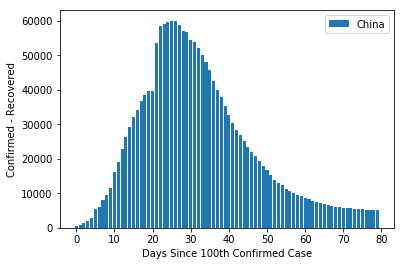

In [39]:
covidPlotter.plot_bar_active(china_diff,'China','Confirmed - Recovered') 

# POPULATION 

First We need to make sure both dataframes keys are matching

In [50]:
population.country[population.country == 'United States']  = 'US'
population.country[population.country == 'Taiwan']  = 'Taiwan*'
population.country[population.country == 'South Korea']  = 'Korea, South'
population.country[population.country == "Côte d'Ivoire"]  = "Cote d'Ivoire"
population.country[population.country == "Czech Republic (Czechia)"]  = "Czechia"
population.country[population.country == 'St. Vincent & Grenadines']  = 'Saint Vincent and the Grenadines'
population.country[population.country == 'Saint Kitts & Nevis']  = 'Saint Kitts and Nevis'
population.country[population.country == 'Sao Tome & Principe']  = 'Sao Tome and Principe'

countries = population['country'].tolist()
# Matching both Sets by Hand
#
#for country in sorted(countries):
#    if country not in unique_countries:
#        print(country)
#
#for country in sorted(unique_countries):
#    if country not in countries:
#        print(country)


Country: Australia, Cases: 6303, Population: 25499884
Country: Austria, Cases: 13806, Population: 9006398
Country: Belgium, Cases: 28018, Population: 11589623
Country: Brazil, Cases: 20727, Population: 212559417
Country: Canada, Cases: 23316, Population: 37742154
Country: Chile, Cases: 6927, Population: 19116201
Country: China, Cases: 83014, Population: 1439323776
Country: Czechia, Cases: 5831, Population: 10708981
Country: Denmark, Cases: 6191, Population: 5792202
Country: Ecuador, Cases: 7257, Population: 17643054
Country: France, Cases: 130727, Population: 65273511
Country: Germany, Cases: 124908, Population: 83783942
Country: India, Cases: 8446, Population: 1380004385
Country: Iran, Cases: 70029, Population: 83992949
Country: Ireland, Cases: 8928, Population: 4937786
Country: Israel, Cases: 10743, Population: 8655535
Country: Italy, Cases: 152271, Population: 60461826
Country: Japan, Cases: 6005, Population: 126476461
Country: Korea, South, Cases: 10480, Population: 51269185
Countr

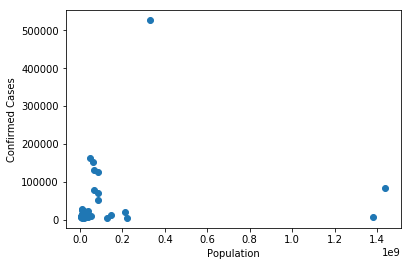

In [51]:
import numpy
fig, ax = plt.subplots(1, 1)
x = []
y = []
labels = []
import sys
covid_19_time_series_confirmed = covid_19_time_series_confirmed.groupby(['Country/Region']).sum().reset_index()
for index, row in covid_19_time_series_confirmed.iterrows():
    for index, row_pop in population.iterrows():
        if row_pop['country'] == row['Country/Region']:
            if row[-1] < 5000: # If number of Confirmed Cases < 5000
                continue
            print("Country: {}, Cases: {}, Population: {}".format(
                  row['Country/Region'], row[-1], row_pop['population'] ))
            x.append(int(row_pop['population']))
            y.append(int(row[-1]))
            labels.append(row['Country/Region'])
            break
plt.scatter(x,y)
plt.xlabel("Population")
plt.ylabel("Confirmed Cases")
plt.show()

Country: Austria, Deaths: 337, Population: 9006398
Country: Belgium, Deaths: 3346, Population: 11589623
Country: Brazil, Deaths: 1124, Population: 212559417
Country: Canada, Deaths: 654, Population: 37742154
Country: China, Deaths: 3343, Population: 1439323776
Country: France, Deaths: 13851, Population: 65273511
Country: Germany, Deaths: 2736, Population: 83783942
Country: Iran, Deaths: 4357, Population: 83992949
Country: Israel, Deaths: 101, Population: 8655535
Country: Italy, Deaths: 19468, Population: 60461826
Country: Korea, South, Deaths: 211, Population: 51269185
Country: Netherlands, Deaths: 2653, Population: 17134872
Country: Portugal, Deaths: 470, Population: 10196709
Country: Russia, Deaths: 106, Population: 145934462
Country: Spain, Deaths: 16606, Population: 46754778
Country: Sweden, Deaths: 887, Population: 10099265
Country: Switzerland, Deaths: 1036, Population: 8654622
Country: Turkey, Deaths: 1101, Population: 84339067
Country: US, Deaths: 20463, Population: 331002651
C

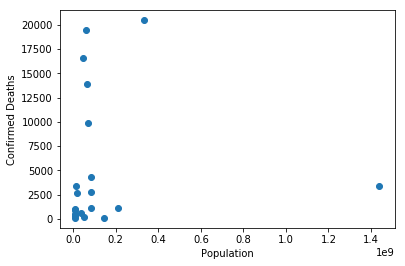

In [45]:
import numpy
fig, ax = plt.subplots(1, 1)
x = []
y = []
import sys
covid_19_time_series_deaths = covid_19_time_series_deaths.groupby(['Country/Region']).sum().reset_index()
for index, row in covid_19_time_series_deaths.iterrows():
    for index, row_pop in population.iterrows():
        if (row_pop['country'] == row['Country/Region']) and (row['Country/Region'] in labels):

            print("Country: {}, Deaths: {}, Population: {}".format(
                  row['Country/Region'], row[-1], row_pop['population'] ))
            x.append(int(row_pop['population']))
            y.append(int(row[-1]))
            labels.append(row['Country/Region'])
            break
plt.scatter(x,y)
plt.xlabel("Population")
plt.ylabel("Confirmed Deaths")
plt.show()

# POPULATION DENSITY

Country: Australia, Cases: 6303, Population Density: 3
Country: Austria, Cases: 13806, Population Density: 109
Country: Belgium, Cases: 28018, Population Density: 383
Country: Brazil, Cases: 20727, Population Density: 25
Country: Canada, Cases: 23316, Population Density: 4
Country: Chile, Cases: 6927, Population Density: 26
Country: China, Cases: 83014, Population Density: 153
Country: Czechia, Cases: 5831, Population Density: 139
Country: Denmark, Cases: 6191, Population Density: 137
Country: Ecuador, Cases: 7257, Population Density: 71
Country: France, Cases: 130727, Population Density: 119
Country: Germany, Cases: 124908, Population Density: 240
Country: India, Cases: 8446, Population Density: 464
Country: Iran, Cases: 70029, Population Density: 52
Country: Ireland, Cases: 8928, Population Density: 72
Country: Israel, Cases: 10743, Population Density: 400
Country: Italy, Cases: 152271, Population Density: 206
Country: Japan, Cases: 6005, Population Density: 347
Country: Korea, South

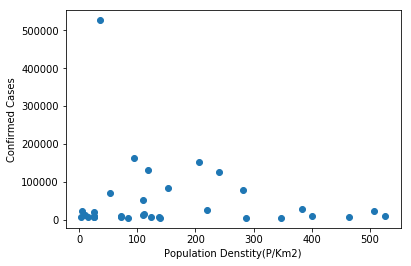

In [52]:
import numpy
fig, ax = plt.subplots(1, 1)
x = []
y = []
labels = []
import sys
covid_19_time_series_confirmed = covid_19_time_series_confirmed.groupby(['Country/Region']).sum().reset_index()
for index, row in covid_19_time_series_confirmed.iterrows():
    for index, row_pop in population.iterrows():
        if row_pop['country'] == row['Country/Region']:
            if row[-1] < 5000: # If number of Confirmed Cases < 1000
                continue
            print("Country: {}, Cases: {}, Population Density: {}".format(
                  row['Country/Region'], row[-1], row_pop['denstity(P/Km2)'] ))
            x.append(int(row_pop['denstity(P/Km2)']))
            y.append(int(row[-1]))
            labels.append(row['Country/Region'])
            break
plt.scatter(x,y)
plt.xlabel("Population Denstity(P/Km2)")
plt.ylabel("Confirmed Cases")
plt.show()